# TidalPy GridPlot Feature
TidalPy offers a helper class called `GridPlot` to quickly create `matplotlib` figures with multiple subplots. This features makes use of matplotlib's [GridSpec](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.gridspec.GridSpec.html) class.

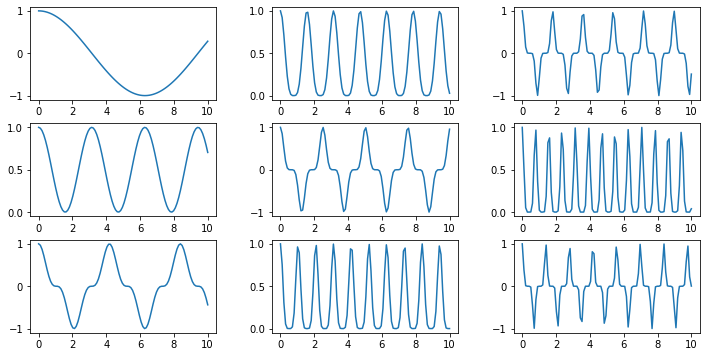

In [1]:
import numpy as np
from TidalPy.utilities.graphics.grid_plot import GridPlot

x = np.linspace(0., 10., 100)

# Make GridPlot instance. Let's make a figure with 3x3 subplots
gp_3x3 = GridPlot(nrows=3, ncols=3)

# Plot some data using standard matplotlib api methods
for i, ax in enumerate(gp_3x3):
    ax.plot(x, np.sin(((i+1)/2)*x + (-1)**(np.mod(i, 2)) * (np.pi / 2))**(i+1))

gp_3x3.show()

## Use with other TidalPy plotting tools
The grid plot can be used with other TidalPy plotting tools. Below are some examples on how to utilize this functionality.

### Projection Maps
For projection maps we can not directly use the `projection_map` function on a regular `GridPlot` instance. Instead, we need to tell GridPlot to make projected axes ahead of time. After a projected GridPlot instance is created we can then call the projection_map function on its axes.

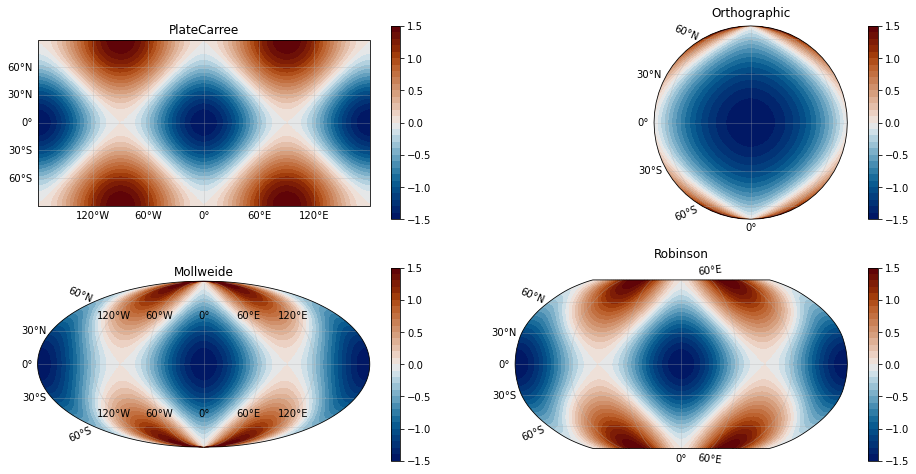

In [5]:
from TidalPy.utilities.graphics.global_map import projection_map

# Always create the gridplot first.
# We need to provide projections ahead of time. The projections can be a single string which will be copied for each subplot or
#    you can provide a list of different projections which we will do for this example.
projections = ['PlateCarree', 'Mollweide', 'Orthographic', 'Robinson']
gp_2x2 = GridPlot(nrows=2, ncols=2, hspace=0.25, wspace=0.15, figure_scale=2.,
                  projections=projections)

# Make some data applicable to projection maps
longitude_deg = np.linspace(0., 360., 100)
colatitude_deg = np.linspace(0., 180., 101)
longitude = np.radians(longitude_deg)
colatitude = np.radians(colatitude_deg)
longitude_matrix, colatitude_matrix = np.meshgrid(longitude, colatitude, indexing='ij')
data = .75 * (np.sin(2. * longitude_matrix - np.pi/2) + np.cos(2. * colatitude_matrix))

for projection, ax in zip(projections, gp_2x2.axes):

    projection_map(longitude_deg, colatitude_deg, data, title=projection,
                   zticks=[-1.5, -1., -0.5, 0, 0.5, 1., 1.5], show_grid_lines=True,
                   ax=ax)

gp_2x2.show()
